In [1]:
import json
import requests
from PIL import Image
import io
from dotenv import dotenv_values
import pytesseract

config = dotenv_values("../.env")

In [2]:
url_token = "https://id.twitch.tv/oauth2/token"
client_id = config.get("CLIENT_ID")
client_secret = config.get("CLIENT_SECRET")

In [3]:
form_urlencoded = f"client_id={client_id}&client_secret={client_secret}&grant_type=client_credentials"
req = requests.post(url_token, data=form_urlencoded)

In [4]:
if req.status_code == 200:
    res_content = json.loads(req.content)
    access_token = res_content["access_token"]
    basic_headers = {
        "Authorization": f"Bearer {access_token}",
        'Client-Id': client_id
    }
else:
    raise Exception

200

### Test Access Token

In [44]:
res = requests.get('https://api.twitch.tv/helix/users?login=twitchdev', headers=basic_headers)
res.content

b'{"data":[{"id":"141981764","login":"twitchdev","display_name":"TwitchDev","type":"","broadcaster_type":"partner","description":"Supporting third-party developers building Twitch integrations from chatbots to game integrations.","profile_image_url":"https://static-cdn.jtvnw.net/jtv_user_pictures/8a6381c7-d0c0-4576-b179-38bd5ce1d6af-profile_image-300x300.png","offline_image_url":"https://static-cdn.jtvnw.net/jtv_user_pictures/3f13ab61-ec78-4fe6-8481-8682cb3b0ac2-channel_offline_image-1920x1080.png","view_count":0,"created_at":"2016-12-14T20:32:28Z"}]}'

## Get Streams

In [62]:
url_streams = "https://api.twitch.tv/helix/streams"
query_params = {
    "type": "live",
    "game_id": "22848", # Red Dead Redemption
}

In [84]:
res = requests.get(url_streams, headers=basic_headers, params={"type": "live"})
res

<Response [200]>

In [85]:
res_json = json.loads(res.content)
thumbnail_url = res_json["data"][0]["thumbnail_url"]
thumbnail_url = thumbnail_url.replace("{width}", "1600").replace("{height}", "900")
thumbnail_url

'https://static-cdn.jtvnw.net/previews-ttv/live_user_xqc-1600x900.jpg'

In [87]:
image_res = requests.get(thumbnail_url)
image_io = io.BytesIO(image_res.content)
img = Image.open(image_io)

In [63]:
res_json = json.loads(res.content)
thumbnail_url = res_json["data"][0]["thumbnail_url"]
thumbnail_url = thumbnail_url.replace("{width}", "1600").replace("{height}", "900")
thumbnail_urlres = requests.get(url_streams, headers=basic_headers, params=query_params)
res

<Response [200]>

In [64]:
res_json = json.loads(res.content)
thumbnail_url = res_json["data"][0]["thumbnail_url"]
thumbnail_url = thumbnail_url.replace("{width}", "1600").replace("{height}", "900")
thumbnail_url

'https://static-cdn.jtvnw.net/previews-ttv/live_user_rusinalapsi-1600x900.jpg'

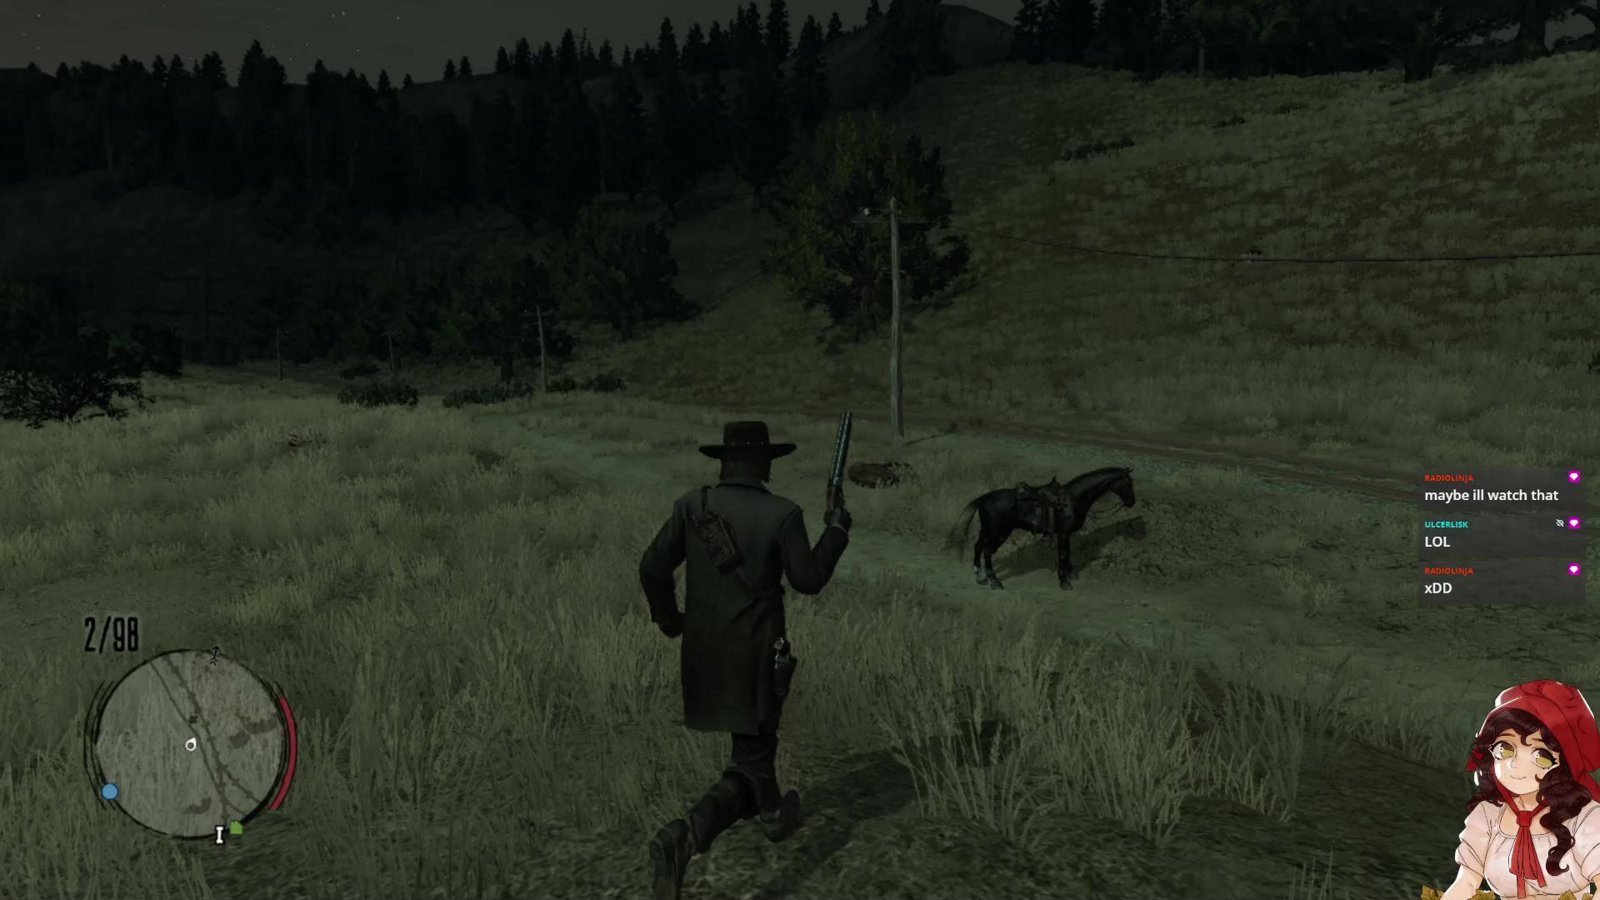

In [65]:
image_res = requests.get(thumbnail_url)
image_io = io.BytesIO(image_res.content)
img = Image.open(image_io)
img

In [66]:
pytesseract.image_to_string(img)

''

In [70]:
query_params["game_id"] = "488552" #Overwatch
query_params["game_id"] = "29595" #DOTA 2

In [71]:
res = requests.get(url_streams, headers=basic_headers, params=query_params)
res

<Response [200]>

In [79]:
res_json = json.loads(res.content)
thumbnail_url = res_json["data"][0]["thumbnail_url"]
game_name = res_json["data"][0]["game_name"]
thumbnail_url = thumbnail_url.replace("{width}", "1600").replace("{height}", "900")

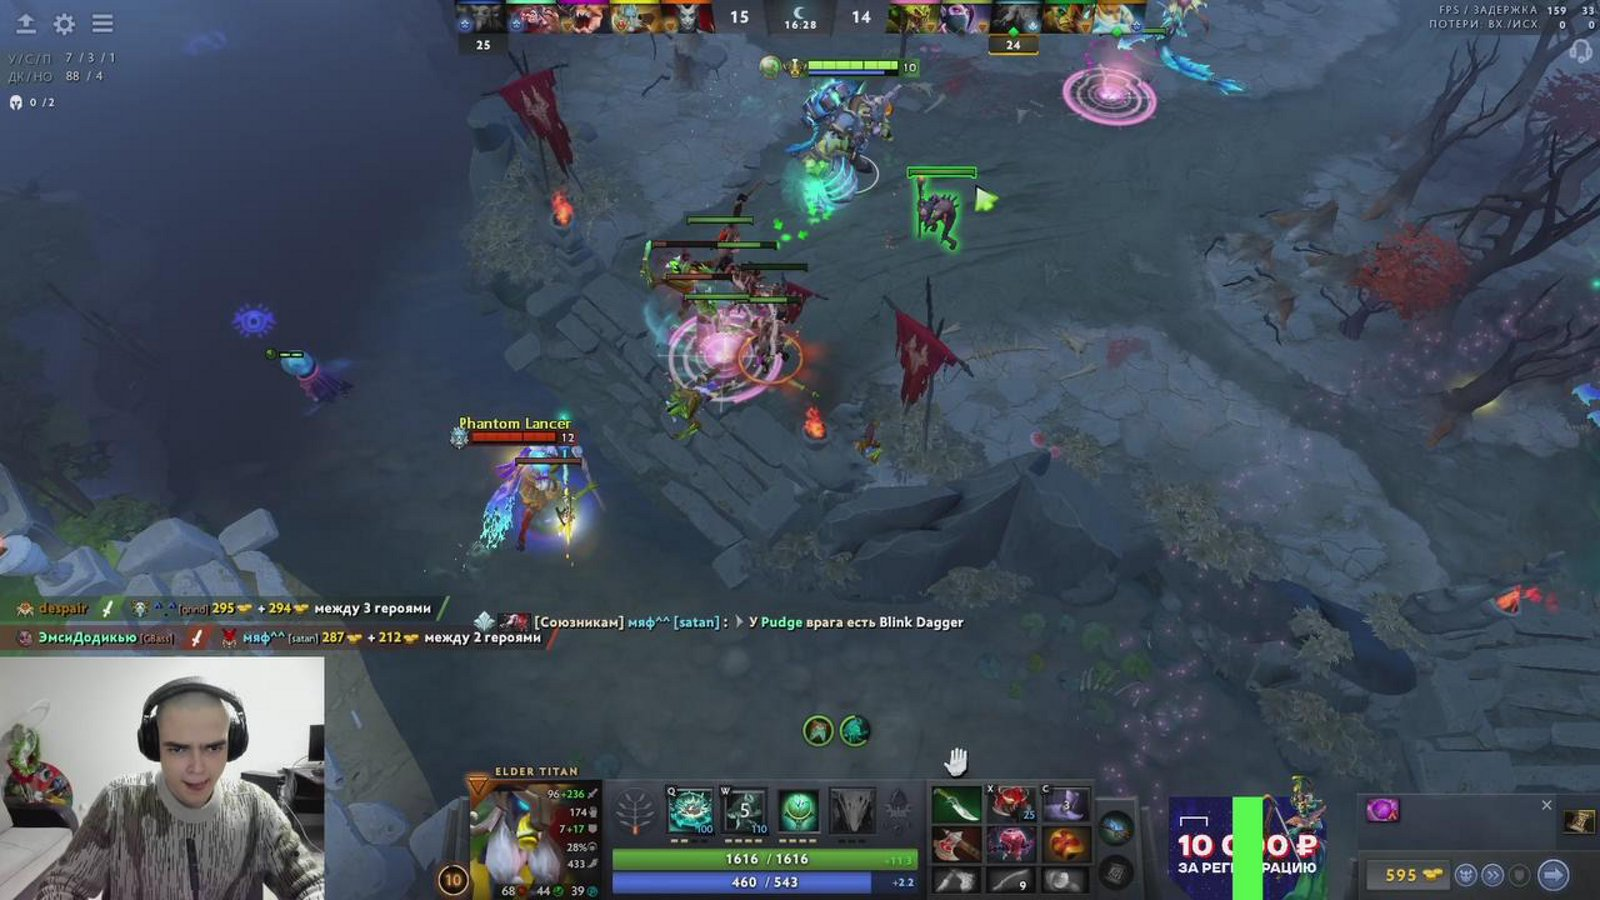

In [73]:
image_res = requests.get(thumbnail_url)
image_io = io.BytesIO(image_res.content)
img = Image.open(image_io)
img

In [80]:
game_name

'Dota 2'

In [74]:
pytesseract.image_to_string(img)

'186% (sor) 287-9 + 212-9" Memay 2repomMn\n\n-#™ [Cowsnnxam] wag** [satan]: > ¥ Pudge spara ects Blink Dagger\n\nELDER TITAN\n\nv\n\nVe ar. =\nz <\npi st\n\noy\n\nrq\nos\n\n‘3.\n\nLa si\n\n.\n\n.\n10\n. SAPET\n'

In [76]:
width, height = img.size

# Setting the points for cropped image
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4

In [77]:
img_cropped = img.crop((left, top, right, bottom))

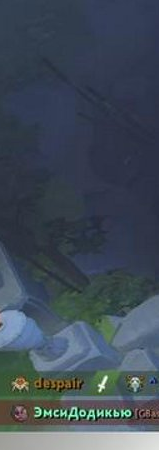

In [78]:
img_cropped